<h2 style='color:blue' align='center'>Data Augmentation To Address Overfitting In Flower Classification CNN</h2>

**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In below image, 4 new training samples are generated from original sample using different transformations

<img src="daisy2.JPG" />

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

<h3 style='color:purple'>Load flowers dataset</h3>

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)/'flower_photos'
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/sunflowers/15460162172_014bcce403.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/20410533613_56da1cce7c.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/184682920_97ae41ce60_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/5966729883_67f4fede93.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/7586498522_4dcab1c8d2_m.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/568715474_bdb64ccc32.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3697780051_83e50a6dd1_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/18563353954_b761d97155_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5578760521_e54aca6bed_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/9320934277_4fb95aef5d_n.jpg')]

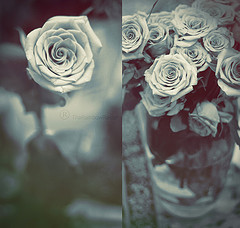

In [8]:
PIL.Image.open(str(roses[1]))

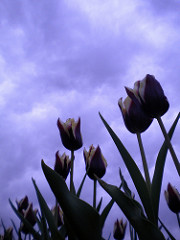

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

<h3 style='color:purple'>Read flowers images from disk into numpy array using opencv</h3>

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/568715474_bdb64ccc32.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/3697780051_83e50a6dd1_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/18563353954_b761d97155_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5578760521_e54aca6bed_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/9320934277_4fb95aef5d_n.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/flower_photos/roses/568715474_bdb64ccc32.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(333, 500, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

<h3 style='color:purple'>Train test split</h3>

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<h3 style='color:purple'>Preprocessing: scale images</h3>

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<h3 style='color:purple'>Build convolutional neural network and train it</h3>

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.2995 - loss: 1.7752
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5614 - loss: 1.0701
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6581 - loss: 0.8820
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7209 - loss: 0.7343
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7901 - loss: 0.5557
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8702 - loss: 0.3558
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9322 - loss: 0.2308
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9575 - loss: 0.1465
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9708 - loss: 0.0933
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9897 - loss: 0.0527
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9802 - loss: 0.0642
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy:

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6225 - loss: 2.4286


[2.37735652923584, 0.6318082809448242]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


array([[ 6.1819086 ,  0.75715786,  3.3225296 , -1.0620288 , -1.7439189 ],
       [ 2.8334534 ,  3.3671699 ,  4.018598  , -4.6101933 ,  8.94336   ],
       [ 4.451795  , -0.05991128,  6.9125595 , -4.0975933 ,  0.98267734],
       ...,
       [-0.10151306,  2.767565  ,  2.35292   ,  4.6062446 ,  0.28629184],
       [14.035417  ,  6.9066515 ,  2.8808122 , -7.768611  ,  3.9633865 ],
       [-6.833791  , -2.7485147 ,  6.3684254 , 20.550463  ,  5.1095376 ]],
      dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

np.int64(0)

In [26]:
y_test[0]

np.int64(1)

<h3 style='color:purple'>Improve Test Accuracy Using Data Augmentation</h3>

In [32]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Original Image**

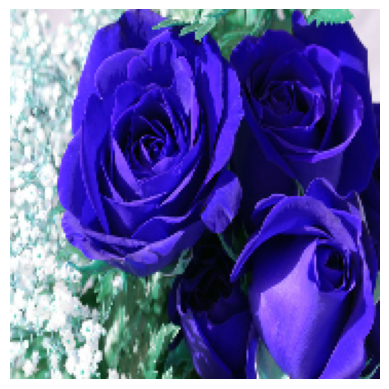

In [33]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

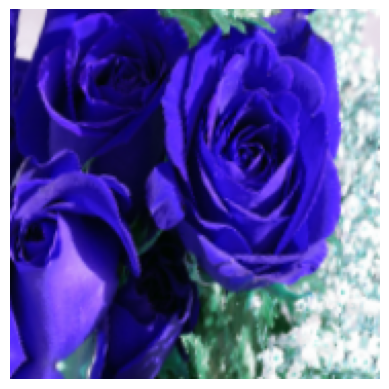

In [34]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

<h3 style='color:purple'>Train the model using data augmentation and a drop out layer</h3>

In [35]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.3192 - loss: 1.5324
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5096 - loss: 1.1452
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6092 - loss: 1.0006
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6558 - loss: 0.8829
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6882 - loss: 0.8021
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7061 - loss: 0.7601
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7172 - loss: 0.7214
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7239 - loss: 0.7163
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7268 - loss: 0.6918
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7660 - loss: 0.5977
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7730 - loss: 0.6097
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy:

In [36]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7305 - loss: 0.9879


[0.9460283517837524, 0.7363834381103516]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**